# Machine Learning Notebook

This notebook is used to experiment different machine learning techniques and evaluate which one is most effective at predicting the motivation of the user after playing a specific game.

## Loading and Preprocessing Data
data is loaded from the habit data csv file and preproccessed so it can be used by machine learning techniques

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
def cleanData(silent, scaled):
    df = pd.read_csv('habit_data.csv')
    if(not silent):
        print("Initial Dataframe")
        print(df.head())
    # One hot encoding for the mood category
    moods = pd.get_dummies(df.mood, prefix='mood')
    df = pd.concat([df, moods], axis = 'columns')
    df = df.drop(['mood', 'mood_Angry'], axis = 'columns')

    gameChoices = pd.get_dummies(df.gameChoice)
    df = pd.concat([df, gameChoices], axis = 'columns')
    df = df.drop(['gameChoice', 'Rainbow_Rotation_Retaliation'], axis = 'columns')
    if(not silent):
        print("\nOne Hot Encoding")
        print(df.head())

    # Replaces ordinal values with integers
    PClassDict =   { 'NEGATIVE':0, 'POSITIVE':1 }

    df['positive'] = df.type.map(PClassDict)
    df = df.drop(['type'], axis = 'columns')

    PDurationDict =   { 'FIVE_MIN':5, 'FIFTEEN_MIN':15, 'HOUR':60, 'OVER_HOUR': 90  }
    df['habit_duration'] = df.duration.map(PDurationDict)
    df = df.drop(['duration'], axis = 'columns')

    PDifficultyDict =   { 'TRIVIAL':0, 'EASY':1, 'MEDIUM':2, 'HARD': 3 }
    df['habit_difficulty'] = df.difficultyLevel.map(PDifficultyDict)
    df = df.drop(['difficultyLevel'], axis = 'columns')
    if(not silent):
        print("\nReplace Ordinal values")
        print (df.head())
    # Split data set for testing
    X = df.iloc[:, :5]
    X1 = df.iloc[:, 6:]
    X = pd.concat([X, X1], axis = 'columns')
    y = df.iloc[:, 5]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # Scale data
    if(scaled):
        sc_X = StandardScaler()
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)
    if(not silent):
        print("\n Scaled Test Set")
        print(X_test[:10])
    return (X_train, X_test, y_train, y_test)
cleanData(False, True)
df.iloc[:, 1:]

Initial Dataframe
   age  automaticity  currentStreak difficultyLevel   duration  \
0    0             1              0            HARD       HOUR   
1    7             5              0         TRIVIAL   FIVE_MIN   
2    8             5              1         TRIVIAL   FIVE_MIN   
3    0             1              1         TRIVIAL   FIVE_MIN   
4    0             1              0          MEDIUM  OVER_HOUR   

               gameChoice  longestStreak   mood  motivation  motivationAfter  \
0     Great_Geometry_Game              0  Angry           1                5   
1  Block_Barricade_Buster              0    Sad           3                6   
2  Block_Barricade_Buster              1    Sad           3                6   
3  Block_Barricade_Buster              1  Happy           1                5   
4     Great_Geometry_Game              0  Happy           1                7   

       time      type  
0  64477251  NEGATIVE  
1  64269060  POSITIVE  
2  64269060  POSITIVE  
3  39739

automaticity  currentStreak difficultyLevel     duration  \
0              1              0            HARD         HOUR   
1              5              0         TRIVIAL     FIVE_MIN   
2              5              1         TRIVIAL     FIVE_MIN   
3              1              1         TRIVIAL     FIVE_MIN   
4              1              0          MEDIUM    OVER_HOUR   
5              3              0            HARD    OVER_HOUR   
6              3              0            HARD    OVER_HOUR   
7              3              0            HARD    OVER_HOUR   
8              5              0            HARD    OVER_HOUR   
9              1              1            HARD    OVER_HOUR   
10             6              1            HARD    OVER_HOUR   
11             7              1          MEDIUM    OVER_HOUR   
12             5              1          MEDIUM    OVER_HOUR   
13             7              1          MEDIUM    OVER_HOUR   
14             6              1          MEDIUM         HOUR   
15             6              1          MEDIUM    OVER_HOUR   
16             1              0         TRIVIAL     FIVE_MIN   
17             7              1          MEDIUM         HOUR   
18             7              2          MEDIUM    OVER_HOUR   
19             1              0         TRIVIAL  FIFTEEN_MIN   
20             1              0            EASY         HOUR   
21             1              0            HARD    OVER_HOUR   
22             6              1         TRIVIAL  FIFTEEN_MIN   
23             6              1            HARD    OVER_HOUR   
24             6              1            EASY         HOUR   
25             6              1         TRIVIAL     FIVE_MIN   
26             5              1          MEDIUM         HOUR   
27             5              2          MEDIUM    OVER_HOUR   
28             6              1         TRIVIAL  FIFTEEN_MIN   
29             6              1            HARD    OVER_HOUR   
30             6              1         TRIVIAL     FIVE_MIN   
31             6              1            EASY         HOUR   
32             4              1         TRIVIAL  FIFTEEN_MIN   
33             4              1            HARD    OVER_HOUR   
34             4              1         TRIVIAL     FIVE_MIN   
35             4              1            EASY         HOUR   
36             1              2          MEDIUM         HOUR   
37             1              2          MEDIUM    OVER_HOUR   
38             1              2          MEDIUM    OVER_HOUR   
39             1              2          MEDIUM         HOUR   
40             1              2          MEDIUM         HOUR   
41             1              2          MEDIUM    OVER_HOUR   
42             5              2          MEDIUM         HOUR   
43             5              2          MEDIUM    OVER_HOUR   
44             1              2         TRIVIAL  FIFTEEN_MIN   
45             1              1            EASY         HOUR   
46             1              2         TRIVIAL     FIVE_MIN   
47             1              1            HARD    OVER_HOUR   
48             7              3          MEDIUM         HOUR   
49             7              2          MEDIUM    OVER_HOUR   
50             2              1            EASY         HOUR   
51             2              2         TRIVIAL     FIVE_MIN   
52             2              3         TRIVIAL  FIFTEEN_MIN   
53             2              1            HARD    OVER_HOUR   
54             1              3         TRIVIAL  FIFTEEN_MIN   
55             1              1            EASY         HOUR   
56             1              1         TRIVIAL     FIVE_MIN   
57             1              0            HARD    OVER_HOUR   
58             1              4          MEDIUM         HOUR   
59             1              2          MEDIUM    OVER_HOUR   

                      gameChoice  longestStreak   mood  motivation  \
0            Great_Geometry_G

In [9]:
import math
math.sqrt(len(y_test))

3.4641016151377544

## K Nearest Neighbors

In [40]:
classifier = KNeighborsClassifier(n_neighbors=3, p=2, metric='euclidean')

In [41]:
(X_train, X_test, y_train, y_test) = cleanData(True)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [42]:
# Predict the test set results
y_pred = classifier.predict(X_test)
print (y_pred)
print (y_test)

[6 5 8 7 8 7 5 8 2 8 8 5]
3     5
4     7
52    2
6     7
51    2
26    8
20    5
9     7
50    2
48    7
34    8
17    6
Name: motivationAfter, dtype: int64


In [43]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[1 0 0 0 2]
 [0 1 1 0 0]
 [0 1 0 0 0]
 [0 1 0 1 2]
 [0 0 0 1 1]]


In [44]:
print(f1_score(y_test, y_pred, average='micro'))
print (accuracy_score(y_test, y_pred))

0.3333333333333333
0.3333333333333333


In [45]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))

1.5833333333333333
6.75


In [13]:
from joblib import dump, load
dump(classifier, 'test.joblib') 

['test.joblib']

## Linear Regression

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv('habit_data.csv')
print(df.head())

   age  automaticity  currentStreak difficultyLevel   duration  \
0    0             1              0            HARD       HOUR   
1    7             5              0         TRIVIAL   FIVE_MIN   
2    8             5              1         TRIVIAL   FIVE_MIN   
3    0             1              1         TRIVIAL   FIVE_MIN   
4    0             1              0          MEDIUM  OVER_HOUR   

               gameChoice  longestStreak   mood  motivation  motivationAfter  \
0     Great_Geometry_Game              0  Angry           1                5   
1  Block_Barricade_Buster              0    Sad           3                6   
2  Block_Barricade_Buster              1    Sad           3                6   
3  Block_Barricade_Buster              1  Happy           1                5   
4     Great_Geometry_Game              0  Happy           1                7   

       time      type  
0  64477251  NEGATIVE  
1  64269060  POSITIVE  
2  64269060  POSITIVE  
3  39739142  POSITIVE  
4 

In [4]:
automaticity = df['automaticity'].values.reshape(-1, 1)
time = df['time'].values.reshape(-1, 1)
age = df['age'].values.reshape(-1, 1)
currentStreak = df['currentStreak'].values.reshape(-1, 1)
longestStreak = df['longestStreak'].values.reshape(-1, 1)
motivation = df['motivation'].values.reshape(-1, 1)
motivationAfter = df['motivationAfter'].values.reshape(-1, 1)

In [5]:
linear_regressor = LinearRegression()  


In [6]:
def linearRegression(X, Y):
    linear_regressor.fit(X, Y)  
    Y_pred = linear_regressor.predict(X) 
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()

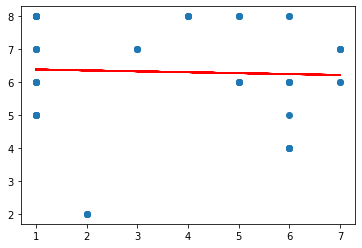

In [8]:
linearRegression(automaticity, motivationAfter)

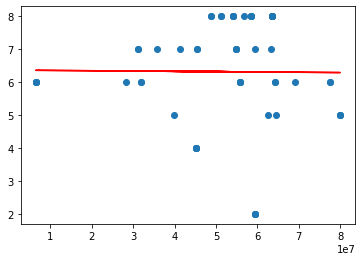

In [9]:
linearRegression(time, motivationAfter)

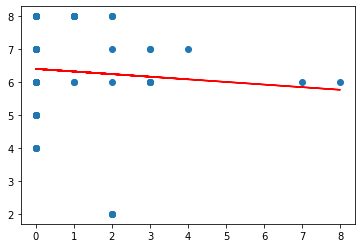

In [10]:
linearRegression(age, motivationAfter)

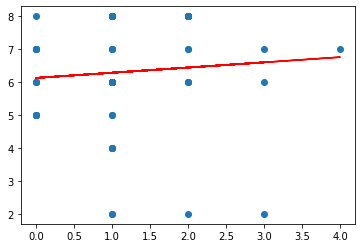

In [11]:
linearRegression(currentStreak, motivationAfter)

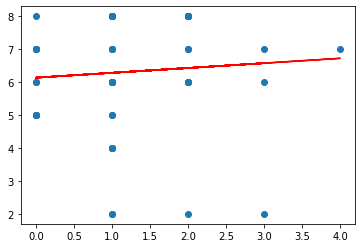

In [12]:
linearRegression(longestStreak, motivationAfter)

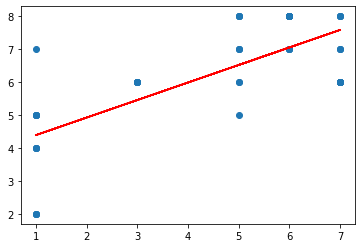

In [13]:
linearRegression(motivation, motivationAfter)

After performing linear regression on the categories with numerical values I analysed that, apart from motivation, the categories didn't have a linear relationship with how the user motivation increased after playing the game. As motivation is just a previous measurement of the resulting category, this suggests that multivariant regression is not likely to be a good model at predicting the motivation after playing the game.

## Multivariant Regression

In [15]:
from sklearn.linear_model import LinearRegression
(X_train, X_test, y_train, y_test) = cleanData(True, True)
reg = LinearRegression() 
reg.fit(X_train, y_train) 


LinearRegression()

In [16]:
reg.coef_

array([-0.26410624, -0.2178819 , -0.01060184,  0.05805446,  1.13131572,
        0.03529928, -0.36519759,  0.45225478, -0.45318261,  0.27447703,
        0.42246249,  0.29861189,  0.43476469,  0.00642378])

In [17]:
test = reg.intercept_

In [20]:
y_pred = reg.predict(X_test)

In [21]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))

0.866512480585038
1.3940812866292325


# Decision Trees

In [22]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
(X_train, X_test, y_train, y_test) = cleanData(True, True)
clf = clf.fit(X_train, y_train)

In [23]:
y_pred = clf.predict(X_test)

[Text(110.90250000000002, 201.90857142857143, 'X[4] <= -1.073\ngini = 0.78\nsamples = 48\nvalue = [4, 3, 5, 14, 8, 14]'),
 Text(50.220000000000006, 170.84571428571428, 'X[0] <= -0.081\ngini = 0.708\nsamples = 12\nvalue = [4, 3, 4, 0, 1, 0]'),
 Text(33.480000000000004, 139.78285714285715, 'X[6] <= -0.084\ngini = 0.594\nsamples = 8\nvalue = [0, 3, 4, 0, 1, 0]'),
 Text(16.740000000000002, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0]'),
 Text(50.220000000000006, 108.72, 'X[5] <= 0.517\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 4, 0, 1, 0]'),
 Text(33.480000000000004, 77.65714285714284, 'X[12] <= -0.304\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 1, 0]'),
 Text(16.740000000000002, 46.59428571428572, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(50.220000000000006, 46.59428571428572, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(66.96000000000001, 77.65714285714284, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0]'),
 Text(66.960000000000

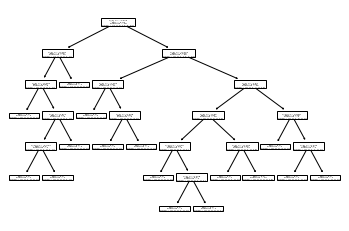

In [24]:
tree.plot_tree(clf) 

In [26]:
decision_tree_mae_list = []
decision_tree_mse_list = []
decision_tree_f1_score_list = []
decision_tree_acc_score_list = []

regression_mae_list = []
regression_mse_list = []
regression_f1_score_list = []
regression_acc_score_list = []

knn_mae_list = []
knn_mse_list = []
knn_f1_score_list = []
knn_acc_score_list = []

X_train, X_test, y_train, y_test = cleanData(True, False)
bestKnnX = X_train
bestKnnY = y_train
bestDtX = X_train
bestDtY = y_train
bestReg = LinearRegression() 
bestRegX = X_train
bestRegY = y_train
for i in range(100):
    non_scaled_X_train, non_scaled_X_test, y_train, y_test = cleanData(True,False)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(non_scaled_X_train)
    X_test = sc_X.transform(non_scaled_X_test)
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)
    decision_tree_pred = clf.predict(X_test)

    reg = LinearRegression() 
    reg.fit(X_train, y_train) 
    regression_pred = reg.predict(X_test)

    classifier = KNeighborsClassifier(n_neighbors=3, p=2, metric='euclidean')
    classifier.fit(X_train, y_train)
    knn_pred = classifier.predict(X_test)

    decision_tree_mae_list.append(metrics.mean_absolute_error(y_test, decision_tree_pred))
    decision_tree_mse_list.append(metrics.mean_squared_error(y_test, decision_tree_pred))
    decision_tree_f1_score_list.append(f1_score(y_test, decision_tree_pred, average='micro'))
    decision_tree_acc_score_list.append(accuracy_score(y_test, decision_tree_pred))
    if (np.amin(decision_tree_mse_list)==metrics.mean_squared_error(y_test, decision_tree_pred)):
        bestDtX = non_scaled_X_train
        bestDtY = y_train

    regression_mae_list.append(metrics.mean_absolute_error(y_test, regression_pred))
    rounded_pred = []
    for pred in y_pred:
        rounded_pred.append(round(pred))
    
    regression_mse_list.append(metrics.mean_squared_error(y_test, regression_pred))
    regression_f1_score_list.append(f1_score(y_test, rounded_pred, average='micro'))
    regression_acc_score_list.append(accuracy_score(y_test, rounded_pred))
    if (np.amin(regression_mse_list)==metrics.mean_squared_error(y_test, regression_pred)):
        bestReg = reg
        bestRegX = non_scaled_X_train

    knn_mae_list.append(metrics.mean_absolute_error(y_test, knn_pred))
    knn_mse_list.append(metrics.mean_squared_error(y_test, knn_pred))
    knn_f1_score_list.append(f1_score(y_test, knn_pred, average='micro'))
    knn_acc_score_list.append(accuracy_score(y_test, knn_pred))
    if (np.amin(knn_mse_list)==metrics.mean_squared_error(y_test, knn_pred)):
        bestKnnX = non_scaled_X_train
        bestKnnY = y_train



1.25
1.25
0.6666666666666666
0.6666666666666666
0.6666666666666666
1.1666666666666667
0.6666666666666666
1.0833333333333333
0.3333333333333333
0.3333333333333333
0.08333333333333333
0.08333333333333333
0.08333333333333333
0.16666666666666666
0.08333333333333333
0.4166666666666667
0.08333333333333333
0.75
0.08333333333333333
0.25
0.08333333333333333
0.5
0.08333333333333333
0.4166666666666667
0.08333333333333333
0.4166666666666667
0.08333333333333333
0.25
0.08333333333333333
0.9166666666666666
0.08333333333333333
0.25
0.08333333333333333
0.75
0.08333333333333333
1.0
0.08333333333333333
1.1666666666666667
0.08333333333333333
0.16666666666666666
0.08333333333333333
0.8333333333333334
0.08333333333333333
0.5
0.08333333333333333
0.6666666666666666
0.08333333333333333
0.75
0.08333333333333333
0.16666666666666666
0.0
0.0
0.0
0.8333333333333334
0.0
0.4166666666666667
0.0
1.25
0.0
0.16666666666666666
0.0
0.5
0.0
0.6666666666666666
0.0
0.6666666666666666
0.0
1.5
0.0
0.5833333333333334
0.0
0.5
0.0

In [27]:
result_dict = {
    'technique': [],
    'mean': [],
    'max': [],
    'min': [],
    'std': []
}

result_dict['technique'].append('knn')
result_dict['mean'].append(np.mean(knn_mse_list))
result_dict['max'].append(np.amax(knn_mse_list))
result_dict['min'].append(np.amin(knn_mse_list))
result_dict['std'].append(np.std(knn_mse_list))

result_dict['technique'].append('regression')
result_dict['mean'].append(np.mean(regression_mse_list))
result_dict['max'].append(np.amax(regression_mse_list))
result_dict['min'].append(np.amin(regression_mse_list))
result_dict['std'].append(np.std(regression_mse_list))

result_dict['technique'].append('dec-tree')
result_dict['mean'].append(np.mean(decision_tree_mse_list))
result_dict['max'].append(np.amax(decision_tree_mse_list))
result_dict['min'].append(np.amin(decision_tree_mse_list))
result_dict['std'].append(np.std(decision_tree_mse_list))

result_df = pd.DataFrame(data=result_dict)
display(result_df)

technique          mean           max       min           std
0         knn  4.737500e+00  1.458333e+01  0.166667  2.840173e+00
1  regression  3.743777e+26  3.743777e+28  0.154663  3.725011e+27
2    dec-tree  6.958333e-01  2.583333e+00  0.000000  4.395981e-01

In [28]:
abs_dict = {
    'technique': [],
    'mean': [],
    'max': [],
    'min': [],
    'std': []
}

abs_dict['technique'].append('knn')
abs_dict['mean'].append(np.mean(knn_mae_list))
abs_dict['max'].append(np.amax(knn_mae_list))
abs_dict['min'].append(np.amin(knn_mae_list))
abs_dict['std'].append(np.std(knn_mae_list))

abs_dict['technique'].append('regression')
abs_dict['mean'].append(np.mean(regression_mae_list))
abs_dict['max'].append(np.amax(regression_mae_list))
abs_dict['min'].append(np.amin(regression_mae_list))
abs_dict['std'].append(np.std(regression_mae_list))

abs_dict['technique'].append('dec-tree')
abs_dict['mean'].append(np.mean(decision_tree_mae_list))
abs_dict['max'].append(np.amax(decision_tree_mae_list))
abs_dict['min'].append(np.amin(decision_tree_mae_list))
abs_dict['std'].append(np.std(decision_tree_mae_list))

abs_df = pd.DataFrame(data=abs_dict)
display(abs_df)

technique          mean           max       min           std
0         knn  1.289167e+00  3.083333e+00  0.166667  4.912364e-01
1  regression  5.585530e+11  5.585530e+13  0.320306  5.557532e+12
2    dec-tree  4.091667e-01  1.250000e+00  0.000000  2.088643e-01

In [29]:
f1_score_dict = {
    'technique': [],
    'mean': [],
    'max': [],
    'min': [],
    'std': []
}

f1_score_dict['technique'].append('knn')
f1_score_dict['mean'].append(np.mean(knn_f1_score_list))
f1_score_dict['max'].append(np.amax(knn_f1_score_list))
f1_score_dict['min'].append(np.amin(knn_f1_score_list))
f1_score_dict['std'].append(np.std(knn_f1_score_list))

f1_score_dict['technique'].append('regression')
f1_score_dict['mean'].append(np.mean(regression_f1_score_list))
f1_score_dict['max'].append(np.amax(regression_f1_score_list))
f1_score_dict['min'].append(np.amin(regression_f1_score_list))
f1_score_dict['std'].append(np.std(regression_f1_score_list))

f1_score_dict['technique'].append('dec-tree')
f1_score_dict['mean'].append(np.mean(decision_tree_f1_score_list))
f1_score_dict['max'].append(np.amax(decision_tree_f1_score_list))
f1_score_dict['min'].append(np.amin(decision_tree_f1_score_list))
f1_score_dict['std'].append(np.std(decision_tree_f1_score_list))

f1_score_df = pd.DataFrame(data=f1_score_dict)
display(f1_score_df)

technique      mean       max       min       std
0         knn  0.471667  0.833333  0.166667  0.129218
1  regression  0.221667  0.583333  0.000000  0.116798
2    dec-tree  0.720000  1.000000  0.333333  0.127758

In [30]:
acc_score_dict = {
    'technique': [],
    'mean': [],
    'max': [],
    'min': [],
    'std': []
}

acc_score_dict['technique'].append('knn')
acc_score_dict['mean'].append(np.mean(knn_acc_score_list))
acc_score_dict['max'].append(np.amax(knn_acc_score_list))
acc_score_dict['min'].append(np.amin(knn_acc_score_list))
acc_score_dict['std'].append(np.std(knn_acc_score_list))

acc_score_dict['technique'].append('regression')
acc_score_dict['mean'].append(np.mean(regression_acc_score_list))
acc_score_dict['max'].append(np.amax(regression_acc_score_list))
acc_score_dict['min'].append(np.amin(regression_acc_score_list))
acc_score_dict['std'].append(np.std(regression_acc_score_list))

acc_score_dict['technique'].append('dec-tree')
acc_score_dict['mean'].append(np.mean(decision_tree_acc_score_list))
acc_score_dict['max'].append(np.amax(decision_tree_acc_score_list))
acc_score_dict['min'].append(np.amin(decision_tree_acc_score_list))
acc_score_dict['std'].append(np.std(decision_tree_acc_score_list))

acc_score_df = pd.DataFrame(data=acc_score_dict)
display(acc_score_df)

technique      mean       max       min       std
0         knn  0.471667  0.833333  0.166667  0.129218
1  regression  0.221667  0.583333  0.000000  0.116798
2    dec-tree  0.720000  1.000000  0.333333  0.127758

## Save models
Save parameters of models in files, move these files to the python directory in the **app/src/main/python** directory
You can change which model is used in the **MachineLearning.py** file in this directory in the **reloadmodel()** method
Decision tree is not a lazy learner but I have not found a way to completely reload the same tree on the app.

In [40]:
# exports training data to recreate knn model
import pickle
import json
from pathlib import Path

path = Path('knn_y_train.csv').resolve()  
pd.DataFrame(bestKnnY).to_csv(path, header=None)

path = Path('knn_x_train.csv').resolve()  
pd.DataFrame(bestKnnX).to_csv(path, header=None)

coef = bestReg.coef_
intercept = bestReg.intercept_
outfile = open("coef.pickle",'wb')
pickle.dump(coef, outfile)
outfile.close()
outfile = open("intercept.pickle",'wb')
pickle.dump(intercept, outfile)
outfile.close()

path = Path('reg_x_train.csv').resolve()  
pd.DataFrame(bestRegX).to_csv(path, header=None)

path = Path('dt_y_train.csv').resolve()  
pd.DataFrame(bestDtY).to_csv(path, header=None)

path = Path('dt_x_train.csv').resolve()  
pd.DataFrame(bestDtX).to_csv(path, header=None)